## Importing the libraries needed

In [1]:
import os

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD



plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

## Creating Artificial Data

In [2]:
def prepare_data(noise = 0.1):
    
    ntot = 100
    ntrain = int(0.75*100)
    ntest = int(0.15*100)

    x = np.random.rand(ntot,1)*2*np.pi
    s=np.random.normal(0,noise,size = (100,1))

    print(s.shape)
    print(x.shape)

    y=np.sin(x)+s

    xtrain, xtest = x[:ntrain], x[ntest:]
    ytrain, ytest = y[:ntrain], y[ntest:]

    plt.plot(xtrain.T,ytrain.T,color = 'red', marker = "o")
    plt.xlabel("Angle [-]")
    plt.ylabel("Sin [-]")
    plt.grid()
    plt.show()

    return xtrain, ytrain, xtest, ytest

In [3]:
def fit_model1(xtrain, ytrain, xtest, ytest, 
               epochs = 1000, batch_size = 75, lr = 0.01, 
               momentum = 0, patience = 100, layers = [10], activ = "tanh"):
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=patience)
    # define model
    model = tf.keras.Sequential()
    model.add(keras.layers.Flatten())

    for i in layers:
        model.add(keras.layers.Dense(i, activation= activ))

    model.add(keras.layers.Dense(1))
    # compile model
    opt = SGD(learning_rate = lr, 
              momentum=momentum)
    
    model.compile(loss='mean_squared_error', 
                  optimizer=opt, 
                  metrics=['mse'])
    input_shape = xtrain.shape
    model.build(input_shape)

    model.summary()
    # fit model
    history = model.fit(xtrain, ytrain, 
                        validation_data=(xtest, ytest), 
                        epochs=epochs,  
                        batch_size=batch_size, 
                        verbose=0, 
                        callbacks=[early_stop])

    return model, history

In [4]:
def plot_history(history, filename, plot_test = True):
    plt.figure()
    plt.semilogy(history.history['loss'], label='Train')
    plt.semilogy(history.history['val_loss'], label='Test')
    plt.grid()
    plt.legend()
    plt.xlabel('Epoch [-]')
    plt.ylabel("Cost function [-]")
    plt.savefig('Plots/History_' + filename + '.pdf', format='pdf',bbox_inches='tight')

def plot_resutls(modelo,XN,filename, xtrainN, ytrain, reverse = False):
    plt.figure()
    Y = modelo.predict(XN)
    plt.plot(XN,Y,color = 'red',linestyle =  '-', label = 'Prediction')
    plt.plot(xtrainN.T[0],ytrain.T[0],"k+", label = 'Data')
    plt.legend()
    plt.xlabel("Angle[-]")
    plt.ylabel("Sin [--]")
    plt.grid()
    plt.savefig('Plots/Results_' +filename + '.pdf', format='pdf',bbox_inches='tight')

(100, 1)
(100, 1)


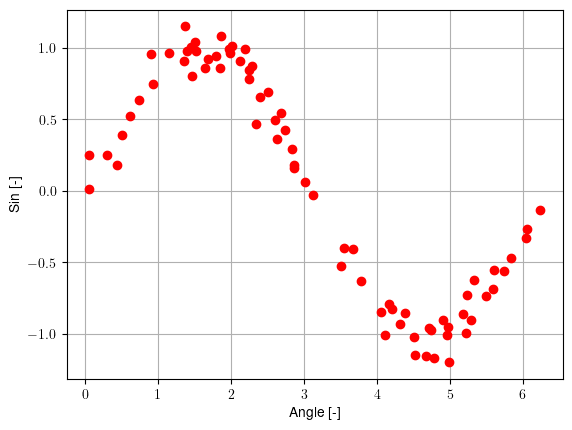

In [5]:
xtrain, ytrain, xtest, ytest = prepare_data()

scaler = preprocessing.MinMaxScaler()

# fit using the train set
scaler.fit(xtrain)

# transform the test test
xtrainN = scaler.transform(xtrain)
xtestN = scaler.transform(xtest) 

X = np.linspace(0.0 , 2.0 * np.pi, 360).reshape(-1, 1)
XN = scaler.transform(X)

## Results

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (75, 1)                   0         
                                                                 
 dense (Dense)               (75, 10)                  20        
                                                                 
 dense_1 (Dense)             (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 4ms/step


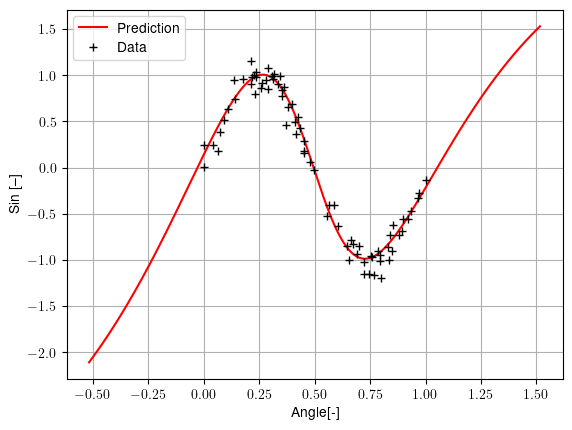

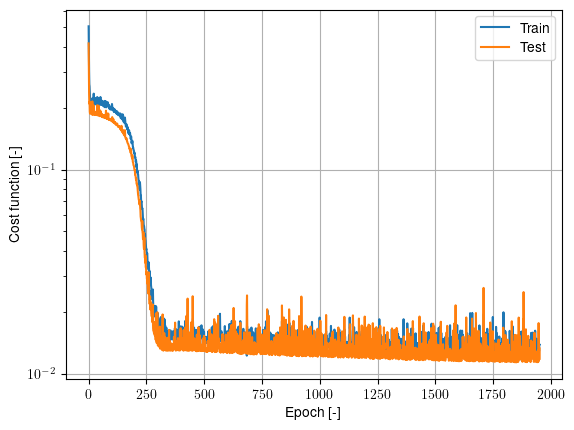

In [6]:
#### Base case

# Characteristics
Case = 'Case_base'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.DataFrame.from_dict(data)

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

## Learning rate

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (75, 1)                   0         
                                                                 
 dense_2 (Dense)             (75, 10)                  20        
                                                                 
 dense_3 (Dense)             (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 4ms/step


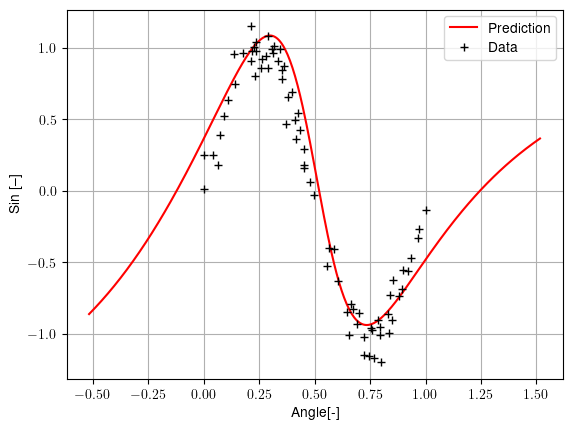

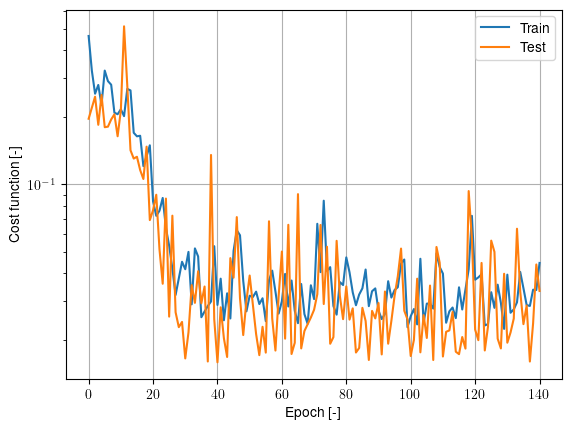

In [7]:
#### Case 1

# Characteristics
Case = 'Case_1'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.1, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (75, 1)                   0         
                                                                 
 dense_4 (Dense)             (75, 10)                  20        
                                                                 
 dense_5 (Dense)             (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 2ms/step


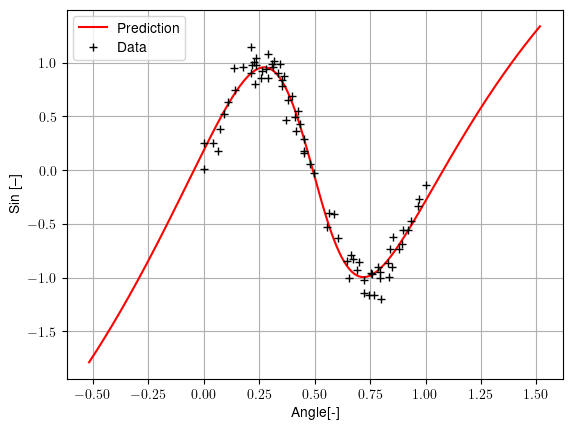

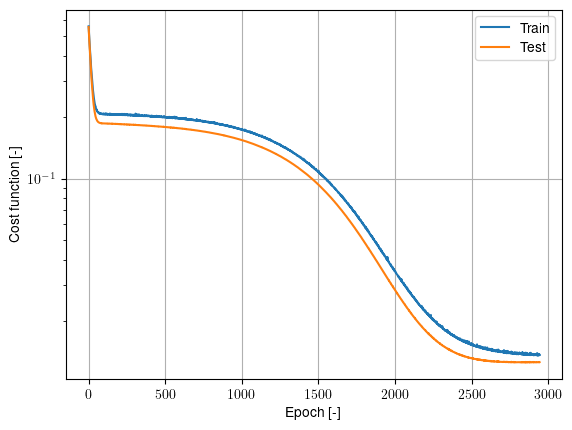

In [8]:
#### Case 2

# Characteristics
Case = 'Case_2'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.001, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

## Momentum

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (75, 1)                   0         
                                                                 
 dense_6 (Dense)             (75, 10)                  20        
                                                                 
 dense_7 (Dense)             (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 910us/step


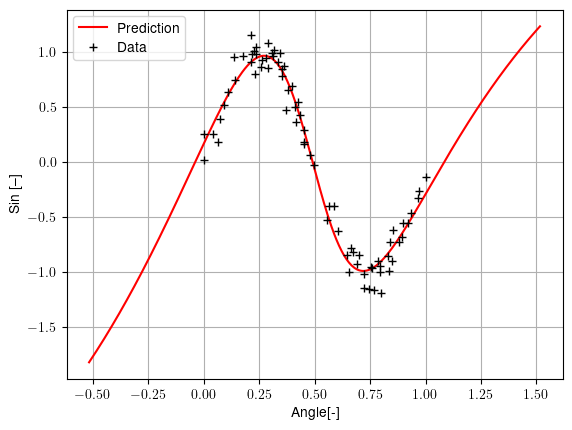

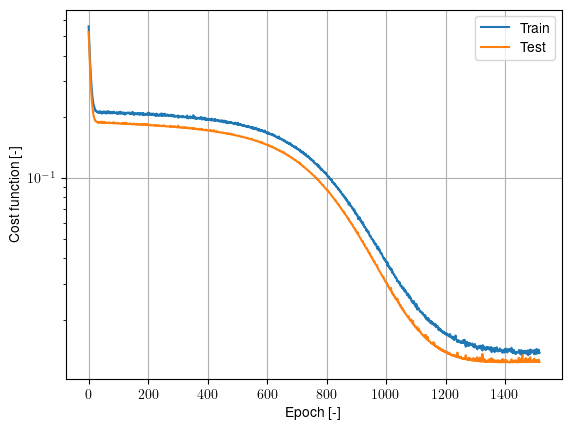

In [9]:
#### Case 3

# Characteristics
Case = 'Case_3'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (75, 1)                   0         
                                                                 
 dense_8 (Dense)             (75, 10)                  20        
                                                                 
 dense_9 (Dense)             (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 818us/step


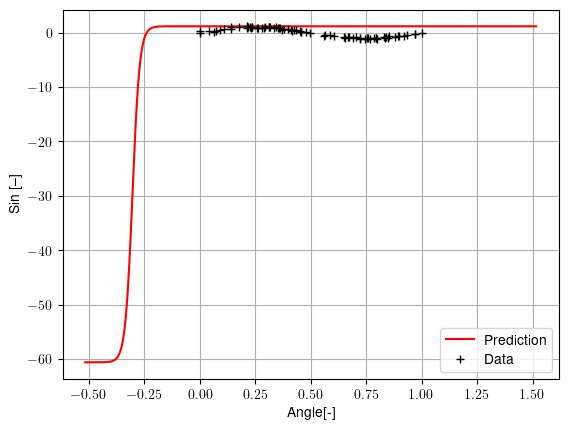

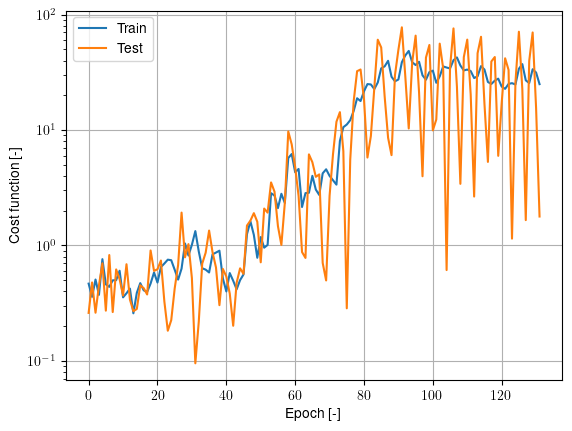

In [10]:
#### Case 4

# Characteristics
Case = 'Case_4'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 1, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

## Batch Size

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (75, 1)                   0         
                                                                 
 dense_10 (Dense)            (75, 10)                  20        
                                                                 
 dense_11 (Dense)            (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 768us/step


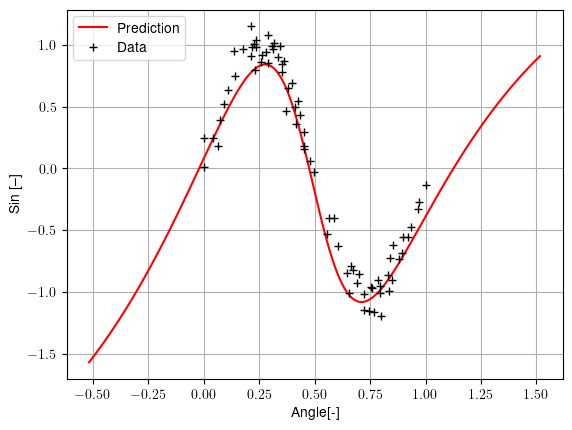

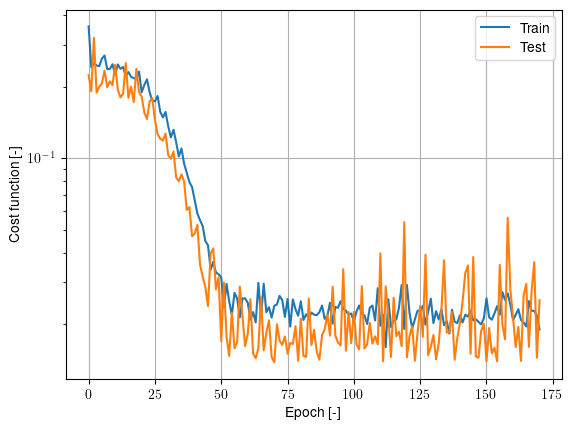

In [11]:
#### Case 5

# Characteristics
Case = 'Case_5'
data = {'epochs': 20000, 
        'batch_size': 1, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (75, 1)                   0         
                                                                 
 dense_12 (Dense)            (75, 10)                  20        
                                                                 
 dense_13 (Dense)            (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 972us/step


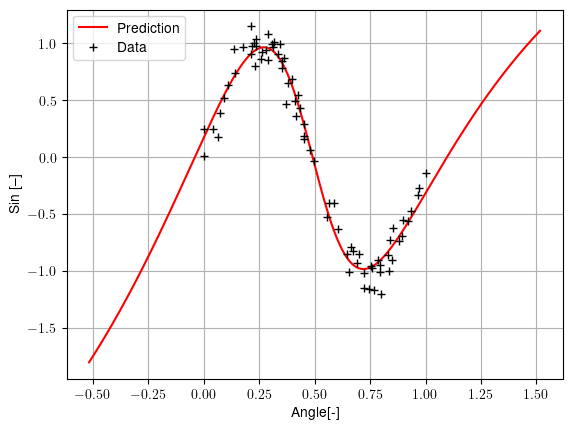

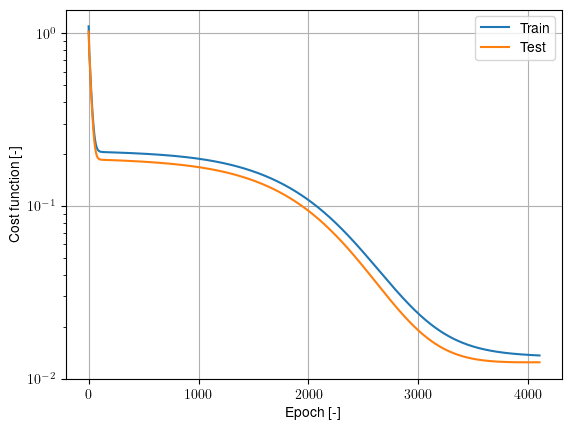

In [12]:
#### Case 6

# Characteristics
Case = 'Case_6'
data = {'epochs': 20000, 
        'batch_size': 75, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

## Patience

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (75, 1)                   0         
                                                                 
 dense_14 (Dense)            (75, 10)                  20        
                                                                 
 dense_15 (Dense)            (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
12/12 [==============================] - 0s 851us/step


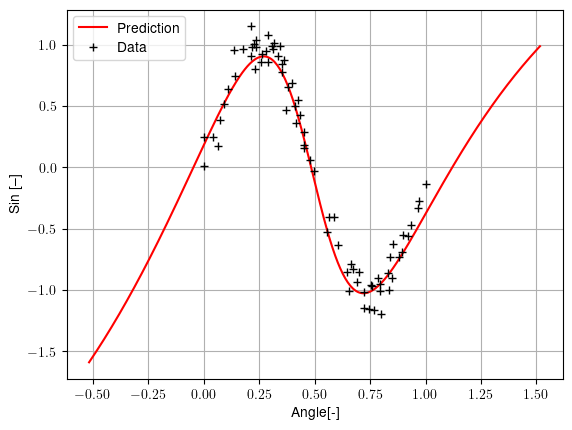

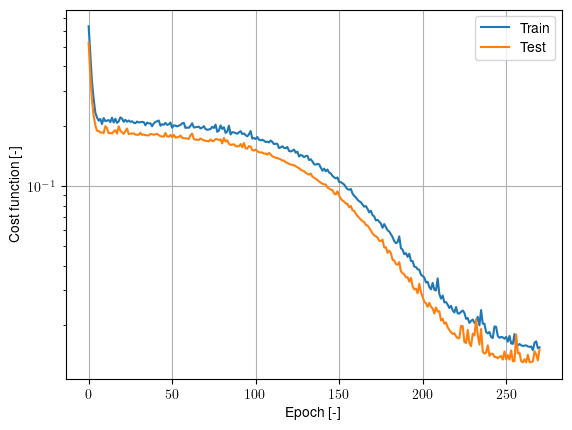

In [13]:
#### Case 7

# Characteristics
Case = 'Case_7'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 10, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

In [14]:
df

,epochs,batch_size,lr,momentum,patience,layers,activ,Acc_train,Acc_test,Epoch_train,Train_loss,Test_loss
0,20000,5,0.010,0.8,100,10,tanh,0.979860,0.980483,1951,0.013889,0.011808
0,20000,5,0.100,0.8,100,10,tanh,0.939382,0.944995,141,0.044459,0.033278
0,20000,5,0.001,0.8,100,10,tanh,0.977887,0.979281,2944,0.013589,0.012535
0,20000,5,0.010,0.0,100,10,tanh,0.978163,0.979546,1516,0.013759,0.012375
0,20000,5,0.010,1.0,100,10,tanh,-2.113384,-1.938828,132,24.967966,1.777972
0,20000,1,0.010,0.8,100,10,tanh,0.957253,0.958377,171,0.018978,0.025182
0,20000,75,0.010,0.8,100,10,tanh,0.977626,0.979448,4104,0.013616,0.012434
0,20000,5,0.010,0.8,10,10,tanh,0.972448,0.974907,271,0.015527,0.015181


In [15]:
data

{'epochs': 20000,
 'batch_size': 5,
 'lr': 0.01,
 'momentum': 0.8,
 'patience': 10,
 'layers': [10],
 'activ': 'tanh',
 'Acc_train': 0.9724483112796812,
 'Acc_test': 0.9749074440919067,
 'Epoch_train': 271,
 'Train_loss': 0.015526706352829933,
 'Test_loss': 0.015180906280875206}

In [16]:
#### Case 8

# Characteristics
Case = 'Case_8'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 1000, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (75, 1)                   0         
                                                                 
 dense_16 (Dense)            (75, 10)                  20        
                                                                 
 dense_17 (Dense)            (75, 1)                   11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Architecture of the Neural Network

In [ ]:
#### Case 9

# Characteristics
Case = 'Case_9'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [100], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

In [ ]:
#### Case 10

# Characteristics
Case = 'Case_10'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [100,10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

# Activation function

In [ ]:
#### Case 11

# Characteristics
Case = 'Case_11'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "sigmoid"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

In [ ]:
#### Case 12

# Characteristics
Case = 'Case_12'
data = {'epochs': 20000, 
        'batch_size': 1, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "ReLU"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

## Reverse Problem 

In [ ]:
#### Case 13

# Characteristics
Case = 'Case_13'
data = {'epochs': 20000, 
        'batch_size': 1, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10],
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(ytrain, xtrainN, ytest, xtestN,**data)

# Accuracy

data['Acc_train'] = r2_score(xtrainN, model.predict(ytrain))
data['Acc_test'] = r2_score(xtestN, model.predict(ytest))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,4*(XN-0.5)+0.5, Case, ytrain, xtrainN)
plot_history(history, Case)

## Data with higher noise

In [ ]:
xtrain, ytrain, xtest, ytest = prepare_data(noise  = 0)

scaler = preprocessing.MinMaxScaler()

# fit using the train set
scaler.fit(xtrain)

# transform the test test
xtrainN = scaler.transform(xtrain)
xtestN = scaler.transform(xtest) 

X = np.linspace(0.0 , 2.0 * np.pi, 360).reshape(-1, 1)
XN = scaler.transform(X)

In [ ]:
#### Case 14

# Characteristics
Case = 'Case_14'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy

data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

In [ ]:
xtrain, ytrain, xtest, ytest = prepare_data(noise  = 0.25)

scaler = preprocessing.MinMaxScaler()

# fit using the train set
scaler.fit(xtrain)

# transform the test test
xtrainN = scaler.transform(xtrain)
xtestN = scaler.transform(xtest) 

X = np.linspace(0.0 , 2.0 * np.pi, 360).reshape(-1, 1)
XN = scaler.transform(X)

In [ ]:
#### Case 15

# Characteristics
Case = 'Case_15'
data = {'epochs': 20000, 
        'batch_size': 5, 
        'lr': 0.01, 
        'momentum': 0.8, 
        'patience': 100, 
        'layers': [10], 
        'activ': "tanh"
        }

# Training the model
model,history = fit_model1(xtrainN, ytrain, xtestN, ytest,**data)

# Accuracy
data['Case'] = Case
data['Acc_train'] = r2_score(ytrain, model.predict(xtrainN))
data['Acc_test'] = r2_score(ytest, model.predict(xtestN))
data['Epoch_train'] = len(history.history['loss'])
data['Train_loss'] = history.history['loss'][-1]
data['Test_loss'] = history.history['val_loss'][-1]

# Keeping the Data in a DataFrame
df = pd.concat([df, pd.DataFrame.from_dict(data)])

# Plotating the results
plot_resutls(model,2*(XN-0.5)+0.5, Case, xtrainN, ytrain)
plot_history(history, Case)

In [ ]:
df